In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('数据示例.xlsx',header=None)
df.rename(columns={0:'Date',1:'F1',2:'F2'},inplace=True)
df.set_index('Date',inplace=True)

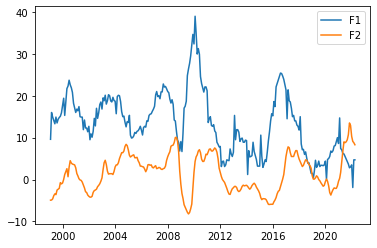

In [3]:
plt.plot(df.F1,label='F1')
plt.plot(df.F2,label='F2')
plt.legend()

In [4]:
from statsmodels.tsa import stattools
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import statsmodels.api as sm
import statsmodels

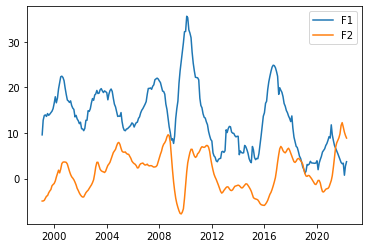

In [5]:
ses1 = SimpleExpSmoothing(np.asarray(df.F1)).fit(smoothing_level=0.5,optimized=False)
ses2 = SimpleExpSmoothing(np.asarray(df.F2)).fit(smoothing_level=0.5,optimized=False)
data = df.copy(deep=True)
data['F1'] = ses1.fittedfcast[1:]
data['F2'] = ses2.fittedfcast[1:]
plt.plot(data.F1,label='F1')
plt.plot(data.F2,label='F2')
plt.legend()

In [7]:
# d = lambda x,y:((x['close']-y['close'])**2+(x['volume']-y['volume'])**2)**0.5
d = lambda x,y: np.abs(x-y)
def dtw_distance(ts_a,ts_b,d,mww=10):
    # ts_a, ts_b = np.array(ts_a), np.array(ts_b)
    M, N = ts_a.shape[0], ts_b.shape[0]
    cost = np.ones((M,N))
    
    cost[0,0] = d(ts_a.iloc[0],ts_b.iloc[0])
    for i in range(1,M):
        cost[i,0] = cost[i-1,0] + d(ts_a.iloc[i], ts_b.iloc[0])
    
    for j in range(1,N):
        cost[0,j] = cost[0,j-1] + d(ts_a.iloc[0], ts_b.iloc[j])
    
    for i in range(1,M):
        for j in range(max(1,i-mww),min(N,i+mww)):
            choices = cost[i-1,j-1], cost[i, j-1], cost[i-1,j]
            cost[i,j] = min(choices) + d(ts_a.iloc[i],ts_b.iloc[j])
    return cost[-1,-1]

In [9]:
dtw_distance(data.F1,data.F2,d)

51.91168438131042